# Part 3: Review other observable data

As previously noted, there are a multitude of factors that impact on stock prices over this period, in particular due to the Covid-19 pandemic.

Since Brexit would be expected to primarily impact on British stocks, we are going to review some data from America to see if the main pattern observed is replicated there.

This will be done using the **Alpha Vantage** API.

This will require the use of an API key, and also additional data wrangling to deal with data in a **JSON** format.

In [1]:
import alpha_vantage
import pandas as pd
import json
import matplotlib.pyplot as plt

In [2]:
%run api_key.ipynb

### First, we are going to look at US consumer sentiment since this will largely drive subsequent price movements. In addition to being a proxy for consolidating all stock data, this automatically adjusts for factors such as inflation.

In [3]:
import requests 
url = 'https://www.alphavantage.co/query?function=CONSUMER_SENTIMENT&apikey='+api_key
r = requests.get(url)
data = r.json()

Check resulting data:

In [4]:
data

{'name': 'Consumer Sentiment & Consumer Confidence',
 'interval': 'monthly',
 'unit': 'index 1966:Q1=100',
 'data': [{'date': '2022-09-01', 'value': '58.6'},
  {'date': '2022-08-01', 'value': '58.2'},
  {'date': '2022-07-01', 'value': '51.5'},
  {'date': '2022-06-01', 'value': '50'},
  {'date': '2022-05-01', 'value': '58.4'},
  {'date': '2022-04-01', 'value': '65.2'},
  {'date': '2022-03-01', 'value': '59.4'},
  {'date': '2022-02-01', 'value': '62.8'},
  {'date': '2022-01-01', 'value': '67.2'},
  {'date': '2021-12-01', 'value': '70.6'},
  {'date': '2021-11-01', 'value': '67.4'},
  {'date': '2021-10-01', 'value': '71.7'},
  {'date': '2021-09-01', 'value': '72.8'},
  {'date': '2021-08-01', 'value': '70.3'},
  {'date': '2021-07-01', 'value': '81.2'},
  {'date': '2021-06-01', 'value': '85.5'},
  {'date': '2021-05-01', 'value': '82.9'},
  {'date': '2021-04-01', 'value': '88.3'},
  {'date': '2021-03-01', 'value': '84.9'},
  {'date': '2021-02-01', 'value': '76.8'},
  {'date': '2021-01-01', 'v

Check datatype:

In [5]:
print(type(data))

<class 'dict'>


Read data and assign it to df variable:

In [6]:
df = pd.DataFrame(data['data'])

Check result:

In [7]:
df.head()

,date,value
0,2022-09-01,58.6
1,2022-08-01,58.2
2,2022-07-01,51.5
3,2022-06-01,50
4,2022-05-01,58.4


**Convert date to date format**

In [8]:
df['date'] = pd.to_datetime(df['date'])

In [9]:
df.head()

,date,value
0,2022-09-01,58.6
1,2022-08-01,58.2
2,2022-07-01,51.5
3,2022-06-01,50
4,2022-05-01,58.4


Set date as index; slice to show correct period; assign this to the df variable.

In [10]:
df = df.set_index('date')

In [11]:
df = df.loc['2018-01-01':'2022-01-01']

In [12]:
df.tail()

,value
date,
2018-05-01,98
2018-04-01,98.8
2018-03-01,101.4
2018-02-01,99.7
2018-01-01,95.7


Set values to float. Reset index and plot X and Y axes:

In [13]:
df['value'] = df['value'].astype(float)

In [14]:
df.reset_index(drop=False, inplace=True)

In [15]:
X = df['date']
Y = df['value']

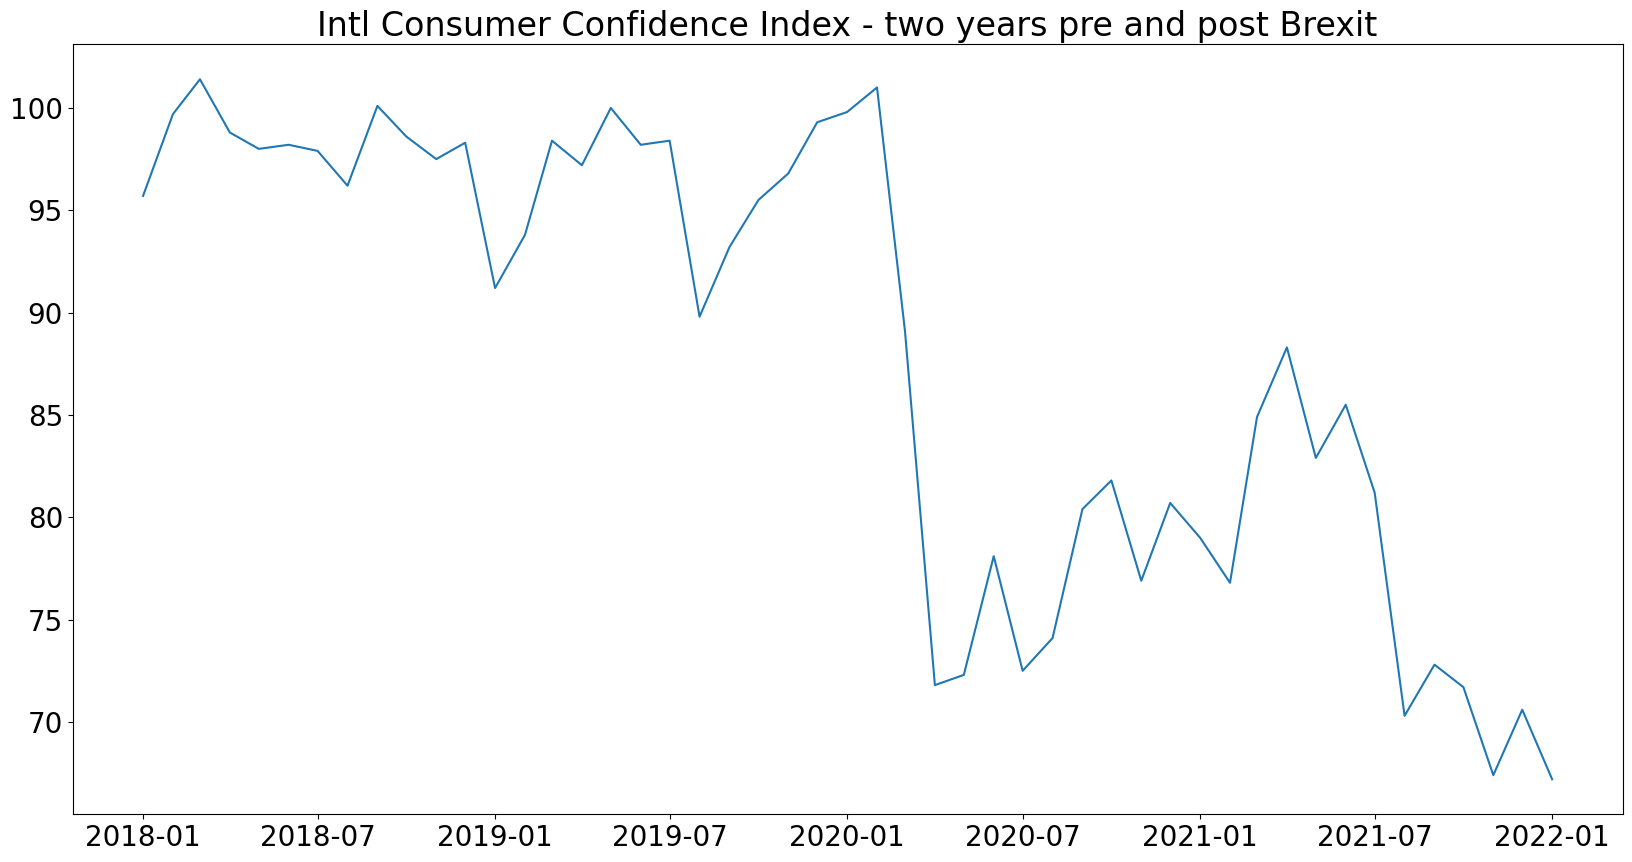

In [21]:
# Formatting code
plt.title('Intl Consumer Confidence Index - two years pre and post Brexit')
plt.rc('axes', labelsize=20)

# Plotting code
plt.plot(X, Y)
plt.rcParams['figure.figsize'] = [20, 10]

This chart provides us with a better insight in to the reason behind the trend observed with some FTSE stocks.

There is a dramatic drop in consumer confidence early in 2020, that conincides with the dip in prices of the FTSE index. 

This is international data, and Brexit is unlikely to have a dominant impact. The loss of confidence can probably be better explained by the start of trade restrictions cuased by the Covid pandemic, and we can infer this is a more likely reason for the drop in stock prices post Brexit.

Although the consumer confidence post January 2020 does improve for a while, the trend does not match the dramatic recovery of the top performing FTSE stocks noted in part 2.

It is has been observed that "the stock market climbs on a wall of worry", meaning this is not an unusual phenomana in the financial markets. 

## Conclusion

The hypothesis that Brexit might have had a been a driving force behind the performance of any of the top performing FTSE stocks here was made as an excuse to examine some of the available data.

In reality, there are many factors at play with a complex inter relationship between them that would require detailed statistical modelling beyond the scope of this mini-project to try and explain the situation.

What has been possible here is to visually observe the correlation between various stocks as well as the international consumer confidence index. This indicates that amongst the stocks examined, the macro economic environment appears to be the driving force behind their price movements, much more so than their fundamentals.